In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import torch
import cv2 
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
import torchvision

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

from Trainer import train_model
from Dataloader import JetcarDataset, SimulatorDataset 
from Models import NetworkNvidia, ResNet18, ResNet34, AlexNet, VGG16

In [2]:
transforms = torch.nn.Sequential(
    # T.RandomResizedCrop(size=(224, 224),scale=(0.9,1)),
    T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 4)),
    T.ColorJitter(brightness=.3, hue=.3, saturation=.3),
    #T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
) 

In [3]:
realData = JetcarDataset("mix_data_wide/data.csv", "mix_data_wide/img/", transform=transforms)
x,y = realData[0]
print(x.shape)
print(y)

(3, 224, 224)
[0.]


In [4]:
len(realData)

6534

[-0.29898983  0.59797966]


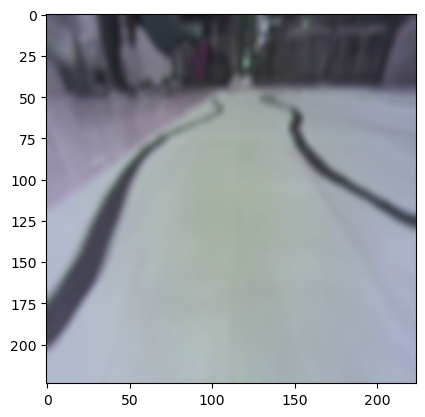

In [5]:
img, label = realData.get_rgb(6500)
plt.imshow(img)
print(label)

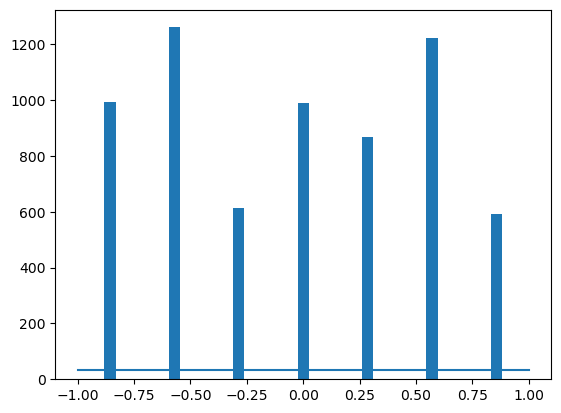

In [6]:
realData.plot_hist()

In [7]:
realData.__len__()

6534

In [8]:
train_generator = DataLoader(realData, batch_size=16, shuffle=True)

In [9]:
x,y = next(iter(train_generator))

In [10]:
x.shape

torch.Size([16, 3, 224, 224])

In [6]:
model = NetworkNvidia()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

2959419


In [7]:
print(model)

NetworkNvidia(
  (conv_layers): Sequential(
    (0): Conv2d(3, 24, kernel_size=(5, 5), stride=(2, 2))
    (1): ELU(alpha=1.0)
    (2): Conv2d(24, 36, kernel_size=(5, 5), stride=(2, 2))
    (3): ELU(alpha=1.0)
    (4): Conv2d(36, 48, kernel_size=(5, 5), stride=(2, 2))
    (5): ELU(alpha=1.0)
    (6): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ELU(alpha=1.0)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): Dropout(p=0.5, inplace=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=28224, out_features=100, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=50, out_features=10, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [103]:
model = ResNet18()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

11177025


/opt/homebrew/Caskroom/miniforge/base/envs/jetracer_mac/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/jetracer_mac/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [104]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9) 
# optimizer = optim.Adam(model.parameters(), lr=0.001) 

In [11]:
device = torch.device("mps")

In [106]:
net, train_loss = train_model(70,model,train_generator,criterion,optimizer, device=device) 

Test loss decreased (inf --> 0.024140. Saving model...
Epoch: 1/70 	Train Loss: 0.024140 	Epoch Time:116.664766
Test loss decreased (0.024140 --> 0.010191. Saving model...
Epoch: 2/70 	Train Loss: 0.010191 	Epoch Time:114.147964
Test loss decreased (0.010191 --> 0.007236. Saving model...
Epoch: 3/70 	Train Loss: 0.007236 	Epoch Time:114.356161
Test loss decreased (0.007236 --> 0.005795. Saving model...
Epoch: 4/70 	Train Loss: 0.005795 	Epoch Time:112.789114
Epoch: 5/70 	Train Loss: 0.005896 	Epoch Time:112.743057
Test loss decreased (0.005795 --> 0.005740. Saving model...
Epoch: 6/70 	Train Loss: 0.005740 	Epoch Time:113.060433
Test loss decreased (0.005740 --> 0.004952. Saving model...
Epoch: 7/70 	Train Loss: 0.004952 	Epoch Time:112.982536
Epoch: 8/70 	Train Loss: 0.005076 	Epoch Time:112.932816
Test loss decreased (0.004952 --> 0.004787. Saving model...
Epoch: 9/70 	Train Loss: 0.004787 	Epoch Time:113.006355
Test loss decreased (0.004787 --> 0.004669. Saving model...
Epoch: 10/70

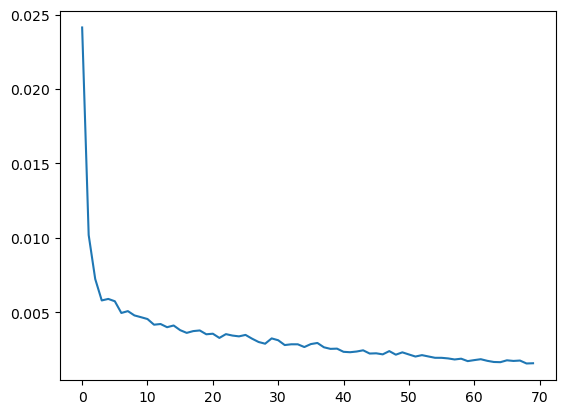

In [107]:
plt.plot(train_loss) 

In [13]:
model = NetworkNvidia()
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9) 
optimizer = optim.Adam(model.parameters(), lr=0.001) 

In [14]:
device = torch.device("mps")
net, train_loss = train_model(100, model, train_generator, criterion, optimizer, device=device) 

Test loss decreased (inf --> 0.020552. Saving model...
Epoch: 1/100 	Train Loss: 0.020552 	Epoch Time:85.306611
Test loss decreased (0.020552 --> 0.008631. Saving model...
Epoch: 2/100 	Train Loss: 0.008631 	Epoch Time:83.742563
Test loss decreased (0.008631 --> 0.005167. Saving model...
Epoch: 3/100 	Train Loss: 0.005167 	Epoch Time:84.033493
Test loss decreased (0.005167 --> 0.004382. Saving model...
Epoch: 4/100 	Train Loss: 0.004382 	Epoch Time:83.564413
Test loss decreased (0.004382 --> 0.004057. Saving model...
Epoch: 5/100 	Train Loss: 0.004057 	Epoch Time:83.277171
Test loss decreased (0.004057 --> 0.003885. Saving model...
Epoch: 6/100 	Train Loss: 0.003885 	Epoch Time:83.537025
Test loss decreased (0.003885 --> 0.003654. Saving model...
Epoch: 7/100 	Train Loss: 0.003654 	Epoch Time:2585.996420
Test loss decreased (0.003654 --> 0.003622. Saving model...
Epoch: 8/100 	Train Loss: 0.003622 	Epoch Time:82.617336
Epoch: 9/100 	Train Loss: 0.003645 	Epoch Time:81.997149
Epoch: 10/

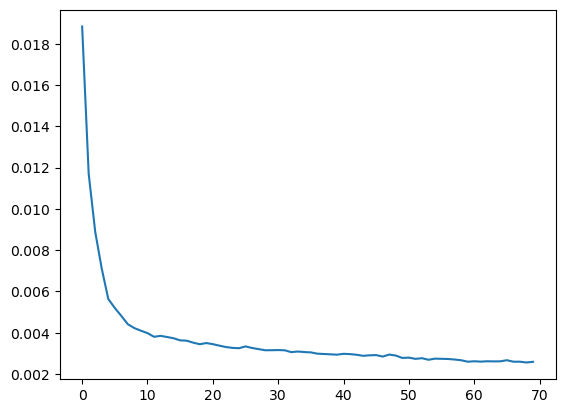

In [ ]:
plt.plot(train_loss) 

In [15]:
x,y = next(iter(train_generator))
out = model(x.to(device))
print(out)

tensor([[-0.6778],
        [ 0.2701],
        [ 0.1455],
        [ 0.4865],
        [-0.7783],
        [-0.2850],
        [ 0.2614],
        [ 0.3930]], device='mps:0', grad_fn=<LinearBackward0>)


/opt/homebrew/Caskroom/miniforge/base/envs/jetracer_mac/lib/python3.8/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


In [21]:
out[2]

tensor([0.1455], device='mps:0', grad_fn=<SelectBackward0>)

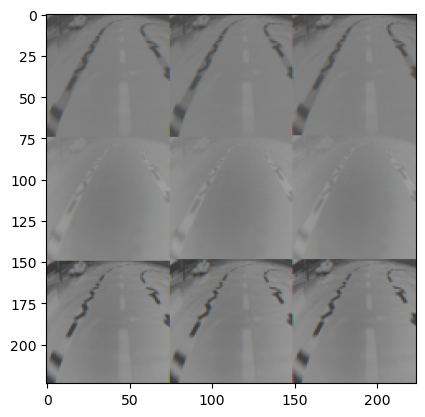

In [22]:
plt.imshow(np.array(x[2].reshape(224,224,3)))

In [85]:
x,y = next(iter(train_generator))
out = model(x.to(device))
print(out)

tensor([[-0.1045,  0.2120],
        [-0.1014,  0.2239],
        [-0.5670,  0.2515],
        [-0.2095,  0.2164]], device='mps:0', grad_fn=<LinearBackward0>)


In [86]:
y

tensor([[ 0.4330,  0.2165],
        [ 0.0618,  0.2165],
        [-1.0000,  0.2371],
        [-0.8660,  0.1753]])

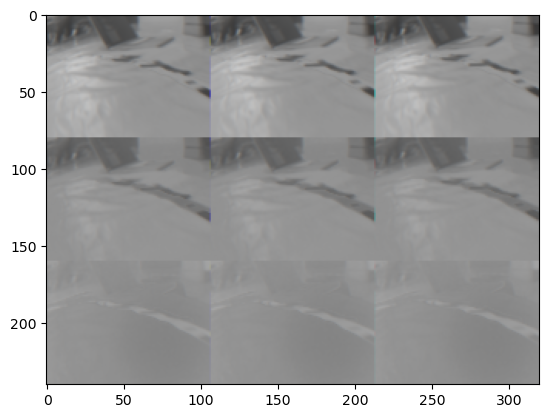

In [91]:
plt.imshow(np.array(x[2].reshape(240,320,3)))

In [99]:
x.max()

tensor(1.)